In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "coin_Bitcoin.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "sudalairajkumar/cryptocurrencypricehistory",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())
print("\nDataFrame Info:")
df.info()
print("\nDescriptive Statistics:")
print(df.describe())

/tmp/ipython-input-753634735.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'cryptocurrencypricehistory' dataset.
First 5 records:    SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC  2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC  2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------

In [2]:
print("Missing values per column:\n", df.isnull().sum())
print("\nNumber of duplicate rows:\n", df.duplicated().sum())

Missing values per column:
 SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

Number of duplicate rows:
 0


In [3]:
import pandas as pd
df['Date'] = pd.to_datetime(df['Date'])
print("DataFrame Info after Date conversion:")
df.info()

DataFrame Info after Date conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        2991 non-null   int64         
 1   Name       2991 non-null   object        
 2   Symbol     2991 non-null   object        
 3   Date       2991 non-null   datetime64[ns]
 4   High       2991 non-null   float64       
 5   Low        2991 non-null   float64       
 6   Open       2991 non-null   float64       
 7   Close      2991 non-null   float64       
 8   Volume     2991 non-null   float64       
 9   Marketcap  2991 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 233.8+ KB


In [4]:
print("Object type columns:\n", df.select_dtypes(include='object').columns)
print("\nUnique values in 'Name' column:")
print(df['Name'].nunique(), "unique values:", df['Name'].unique())
print("\nUnique values in 'Symbol' column:")
print(df['Symbol'].nunique(), "unique values:", df['Symbol'].unique())

Object type columns:
 Index(['Name', 'Symbol'], dtype='object')

Unique values in 'Name' column:
1 unique values: ['Bitcoin']

Unique values in 'Symbol' column:
1 unique values: ['BTC']


In [5]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['SNo']]

# Instantiate StandardScaler
scaler = StandardScaler()

# Apply standardization
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Descriptive statistics after standardization:")
print(df[numerical_cols].describe())

Descriptive statistics after standardization:
               High           Low          Open         Close        Volume  \
count  2.991000e+03  2.991000e+03  2.991000e+03  2.991000e+03  2.991000e+03   
mean  -7.601928e-17 -3.800964e-17  3.800964e-17  7.601928e-17  1.140289e-16   
std    1.000167e+00  1.000167e+00  1.000167e+00  1.000167e+00  1.000167e+00   
min   -5.857600e-01 -5.908122e-01 -5.875908e-01 -5.880587e-01 -5.774887e-01   
25%   -5.546955e-01 -5.579286e-01 -5.555213e-01 -5.560004e-01 -5.758808e-01   
50%   -3.870595e-01 -3.963766e-01 -3.925390e-01 -3.917122e-01 -5.273963e-01   
75%    1.581152e-01  1.659847e-01  1.656463e-01  1.650944e-01  2.654808e-01   
max    4.979842e+00  5.127621e+00  5.034806e+00  5.027523e+00  1.800621e+01   

         Marketcap  
count  2991.000000  
mean      0.000000  
std       1.000167  
min      -0.569430  
25%      -0.543223  
50%      -0.395721  
75%       0.138068  
max       5.051895  


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries matplotlib.pyplot and seaborn imported.")

Libraries matplotlib.pyplot and seaborn imported.


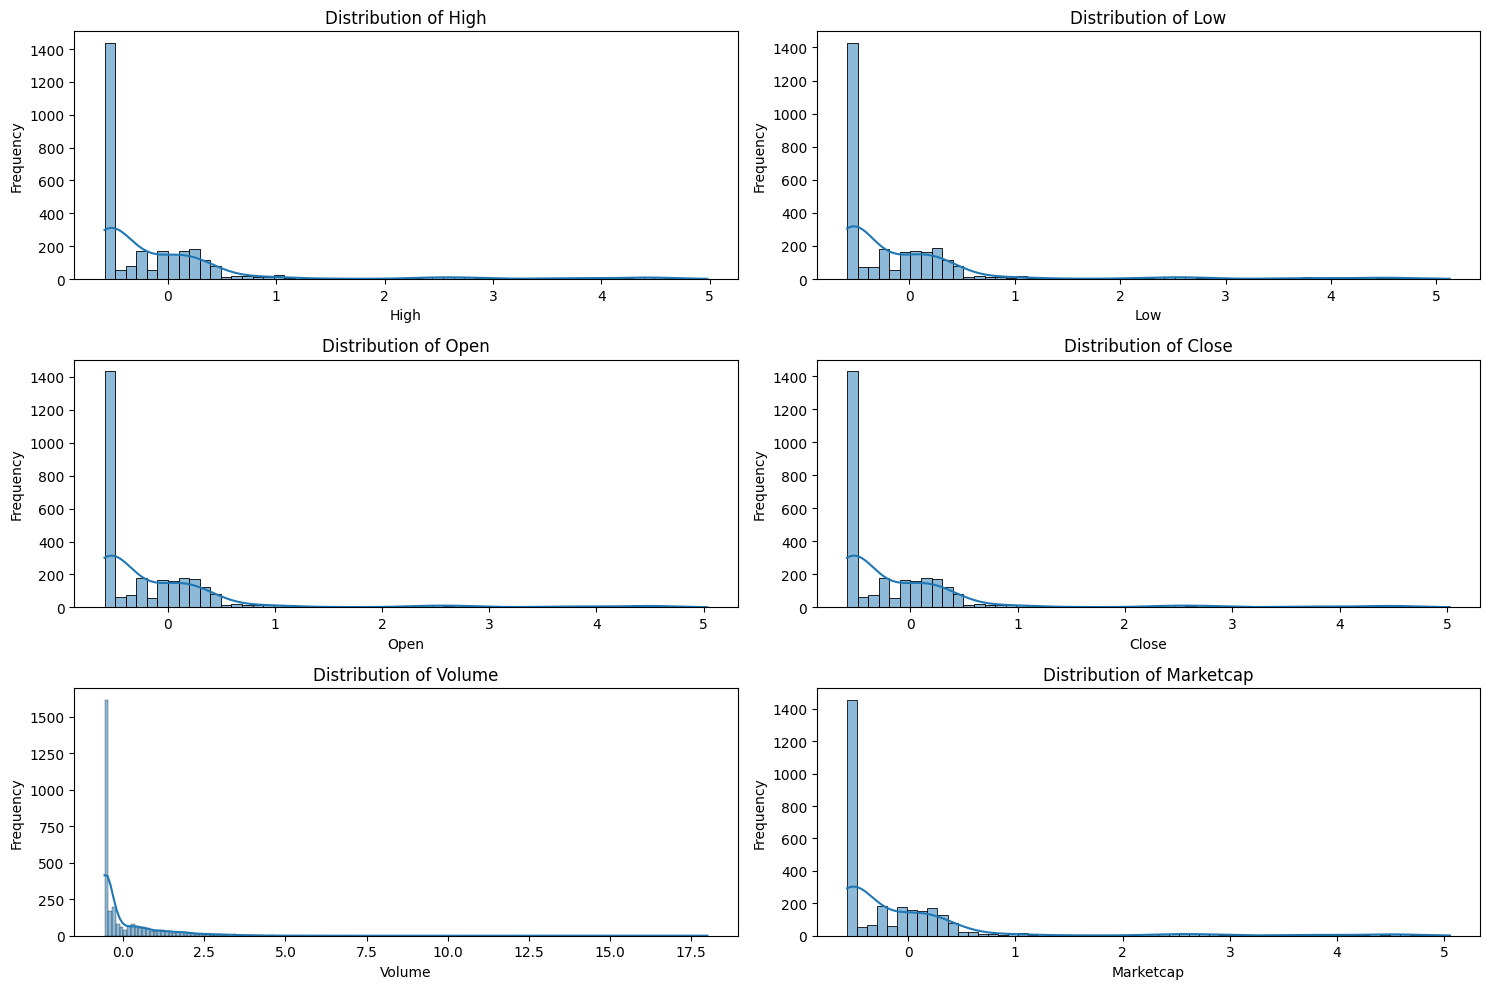

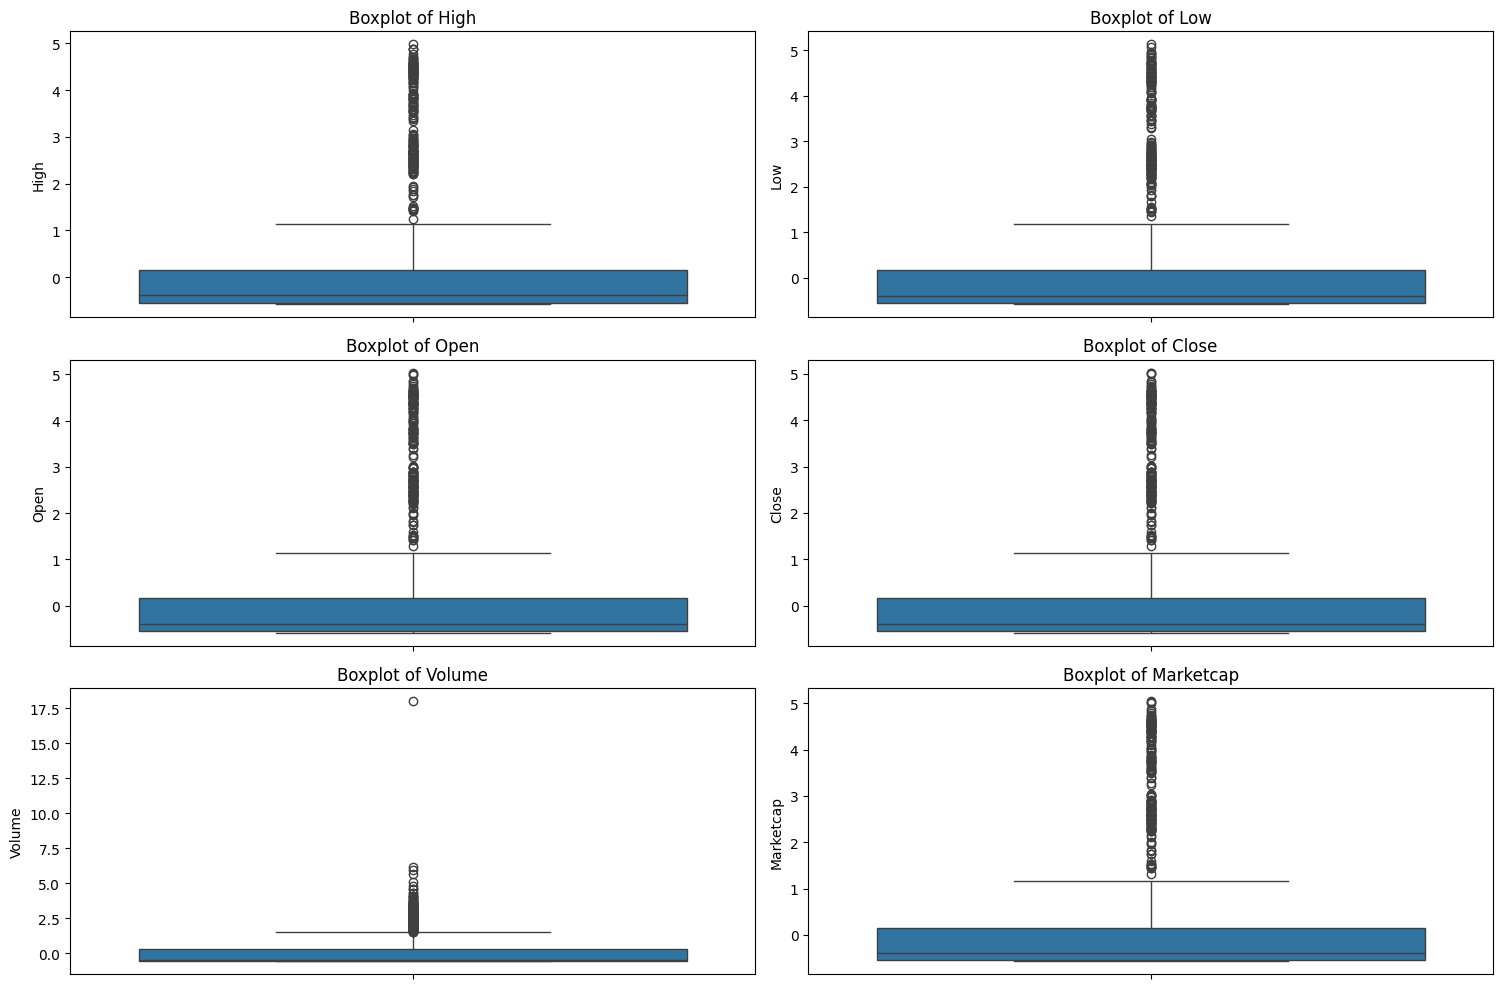

Histograms and boxplots for numerical columns displayed.


In [7]:
numerical_cols = ['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

print("Histograms and boxplots for numerical columns displayed.")

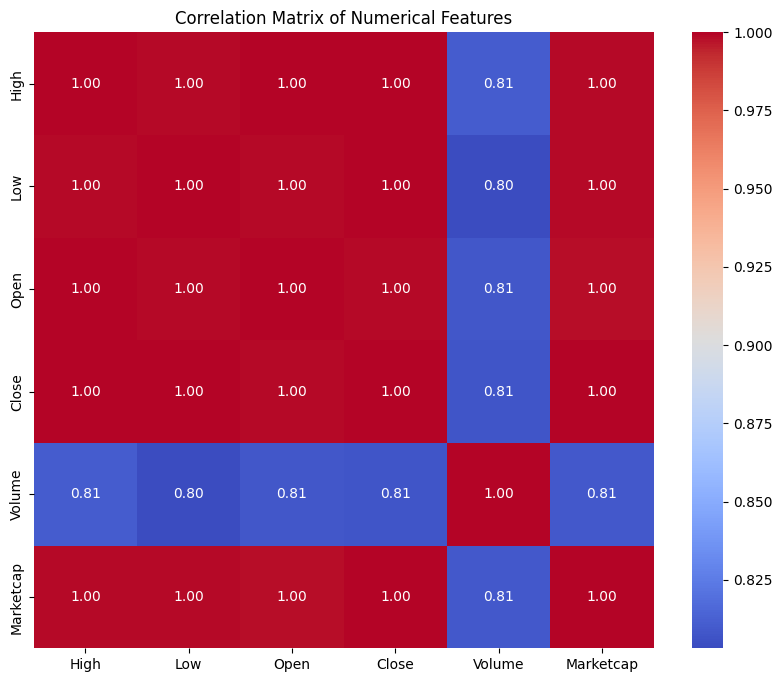

Correlation matrix and heatmap displayed.


In [8]:
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("Correlation matrix and heatmap displayed.")

In [9]:
df = df.sort_values(by='Date', ascending=True).reset_index(drop=True)
print("DataFrame sorted by 'Date' column.")

DataFrame sorted by 'Date' column.


In [10]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
print("Extracted 'Year', 'Month', 'Day', and 'DayOfWeek' features.")

Extracted 'Year', 'Month', 'Day', and 'DayOfWeek' features.


In [11]:
df['Previous_Close'] = df['Close'].shift(1).fillna(0)
print("Created 'Previous_Close' feature.")

Created 'Previous_Close' feature.


In [12]:
df['Close_7_day_MA'] = df['Close'].rolling(window=7).mean().fillna(0)
print("Created 'Close_7_day_MA' feature.")

Created 'Close_7_day_MA' feature.


In [13]:
print("DataFrame with new features:")
print(df.head())

DataFrame with new features:
   SNo     Name Symbol                Date      High       Low      Open  \
0    1  Bitcoin    BTC 2013-04-29 23:59:59 -0.579495 -0.584511 -0.581748   
1    2  Bitcoin    BTC 2013-04-30 23:59:59 -0.579543 -0.584507 -0.580902   
2    3  Bitcoin    BTC 2013-05-01 23:59:59 -0.580148 -0.586930 -0.581345   
3    4  Bitcoin    BTC 2013-05-02 23:59:59 -0.581376 -0.588350 -0.583349   
4    5  Bitcoin    BTC 2013-05-03 23:59:59 -0.582876 -0.589563 -0.584246   

      Close    Volume  Marketcap  Year  Month  Day  DayOfWeek  Previous_Close  \
0 -0.581321 -0.577489  -0.565517  2013      4   29          0        0.000000   
1 -0.581812 -0.577489  -0.565806  2013      4   30          1       -0.581321   
2 -0.583760 -0.577489  -0.566962  2013      5    1          2       -0.581812   
3 -0.584803 -0.577489  -0.567580  2013      5    2          3       -0.583760   
4 -0.585463 -0.577489  -0.567972  2013      5    3          4       -0.584803   

   Close_7_day_MA  
0      

In [14]:
X = df.drop(columns=['SNo', 'Name', 'Symbol', 'Date', 'Close'])
y = df['Close']

print("Defined feature matrix X and target variable y.")

Defined feature matrix X and target variable y.


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets.
X_train shape: (2392, 11)
X_test shape: (599, 11)
y_train shape: (2392,)
y_test shape: (599,)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Instantiate models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(random_state=42)
gradient_boosting_model = GradientBoostingRegressor(random_state=42)

# Train models
print("Training Linear Regression model...")
linear_model.fit(X_train, y_train)
print("Linear Regression model trained.")

print("Training Random Forest Regressor model...")
random_forest_model.fit(X_train, y_train)
print("Random Forest Regressor model trained.")

print("Training Gradient Boosting Regressor model...")
gradient_boosting_model.fit(X_train, y_train)
print("Gradient Boosting Regressor model trained.")

Training Linear Regression model...
Linear Regression model trained.
Training Random Forest Regressor model...
Random Forest Regressor model trained.
Training Gradient Boosting Regressor model...
Gradient Boosting Regressor model trained.


In [17]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# Define param_grid for RandomForestRegressor
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10]
}

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3)

# Create GridSearchCV object for RandomForestRegressor
grid_search_rf = GridSearchCV(estimator=random_forest_model, param_grid=param_grid_rf, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Execute the search for best hyperparameters for RandomForestRegressor
print("Starting GridSearchCV for Random Forest Regressor...")
grid_search_rf.fit(X_train, y_train)
print("GridSearchCV for Random Forest Regressor completed.")

# Store the best model
best_random_forest_model = grid_search_rf.best_estimator_

# Display best parameters and best score for RandomForestRegressor
print("\nBest parameters for Random Forest Regressor:", grid_search_rf.best_params_)
print("Best cross-validation score (negative MSE) for Random Forest Regressor:", grid_search_rf.best_score_)

Starting GridSearchCV for Random Forest Regressor...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
GridSearchCV for Random Forest Regressor completed.

Best parameters for Random Forest Regressor: {'max_depth': 10, 'n_estimators': 100}
Best cross-validation score (negative MSE) for Random Forest Regressor: -0.07641980276365049


In [18]:
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# Create GridSearchCV object for GradientBoostingRegressor
grid_search_gb = GridSearchCV(estimator=gradient_boosting_model, param_grid=param_grid_gb, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Execute the search for best hyperparameters for GradientBoostingRegressor
print("Starting GridSearchCV for Gradient Boosting Regressor...")
grid_search_gb.fit(X_train, y_train)
print("GridSearchCV for Gradient Boosting Regressor completed.")

# Store the best model
best_gradient_boosting_model = grid_search_gb.best_estimator_

# Display best parameters and best score for GradientBoostingRegressor
print("\nBest parameters for Gradient Boosting Regressor:", grid_search_gb.best_params_)
print("Best cross-validation score (negative MSE) for Gradient Boosting Regressor:", grid_search_gb.best_score_)

Starting GridSearchCV for Gradient Boosting Regressor...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
GridSearchCV for Gradient Boosting Regressor completed.

Best parameters for Gradient Boosting Regressor: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best cross-validation score (negative MSE) for Gradient Boosting Regressor: -0.0763035758382719


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Make predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = best_random_forest_model.predict(X_test)
y_pred_gb = best_gradient_boosting_model.predict(X_test)

# Evaluate Linear Regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("\n--- Linear Regression Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse_linear:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear:.4f}")
print(f"Mean Absolute Error (MAE): {mae_linear:.4f}")
print(f"R-squared (R2): {r2_linear:.4f}")

# Evaluate Random Forest Regressor model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n--- Random Forest Regressor Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"R-squared (R2): {r2_rf:.4f}")

# Evaluate Gradient Boosting Regressor model
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\n--- Gradient Boosting Regressor Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse_gb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.4f}")
print(f"Mean Absolute Error (MAE): {mae_gb:.4f}")
print(f"R-squared (R2): {r2_gb:.4f}")


--- Linear Regression Model Evaluation ---
Mean Squared Error (MSE): 0.0144
Root Mean Squared Error (RMSE): 0.1200
Mean Absolute Error (MAE): 0.0771
R-squared (R2): 0.9940

--- Random Forest Regressor Model Evaluation ---
Mean Squared Error (MSE): 1.9899
Root Mean Squared Error (RMSE): 1.4106
Mean Absolute Error (MAE): 0.7652
R-squared (R2): 0.1654

--- Gradient Boosting Regressor Model Evaluation ---
Mean Squared Error (MSE): 1.9411
Root Mean Squared Error (RMSE): 1.3932
Mean Absolute Error (MAE): 0.7551
R-squared (R2): 0.1859
